In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\Basil C Babu\Downloads\Wine_clust.csv')

In [3]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [14]:
from sklearn.cluster import KMeans, DBSCAN

# KMeans Clustering

C:\Users\Basil C Babu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


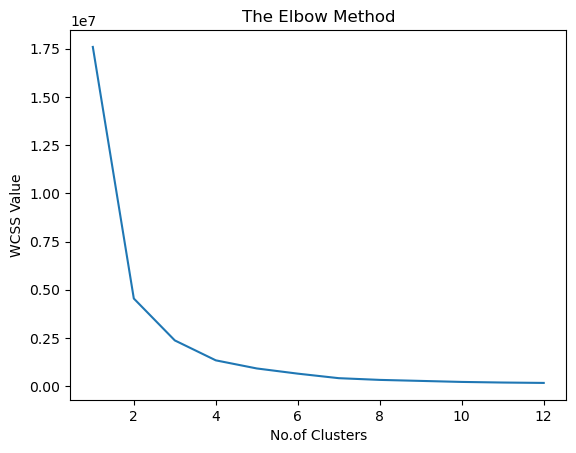

In [10]:
wcss=[]
for i in range(1,13):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state= 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('The Elbow Method')
plt.xlabel('No.of Clusters')
plt.ylabel('WCSS Value')
plt.show()

In [19]:
data= data.iloc[:,[0,12]].values

In [20]:
type(data)

numpy.ndarray

In [12]:
kmeans = KMeans(n_clusters =4, init = 'k-means++', random_state= 42)
y_kmeans= kmeans.fit_predict(data)

In [13]:
y_kmeans

array([1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 2])

# DB Clustering

In [16]:
db_cluster = DBSCAN(eps=0.3, min_samples=10)
db_cluster.fit(data)
db_pred = db_cluster.fit_predict(data)

In [17]:
db_pred 

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

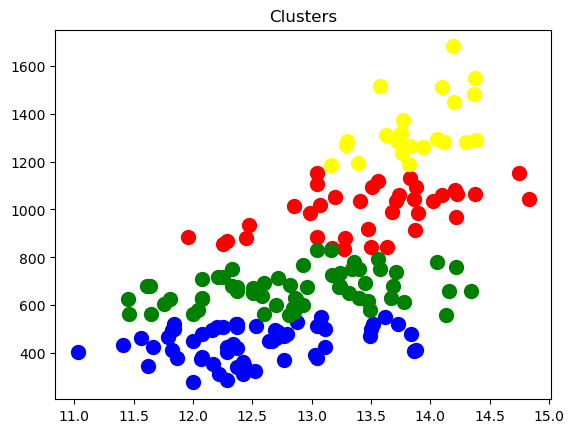

In [21]:
plt.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100, c = 'blue',label = 'Cluster1')
plt.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100, c = 'red',label = 'Cluster2')
plt.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100, c = 'green',label = 'Cluster3')
plt.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100, c = 'yellow',label = 'Cluster1')
plt.title('Clusters')

plt.show()